In [1]:
#importing packages and dependancies 
import numpy as np
import pandas as pd
#IMPORT BeautifulSoup library
from bs4 import BeautifulSoup
import requests
import json
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import csv

In [3]:
#helps verify https calls
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

## Data collection and wrangling

In [4]:
melbdf = pd.read_csv('Inner Melb P codes.csv',index_col=False)
melbdf.head()

,Suburb,Post code
0,Carlton,3053
1,Carlton North,3054
2,Docklands,3008
3,East Melbourne,3002
4,Flemington,3031


In [5]:
melbdf.astype({'Post code': 'object'}).dtypes

Suburb       object
Post code    object
dtype: object

### getting post code coordinates

In [6]:
import pgeocode # import geocoder

post_code_list = melbdf['Post code'].tolist()
print(post_code_list)

nomi = pgeocode.Nominatim('au')
geodf = nomi.query_postal_code(["3053", "3054", "3008", "3002", "3031", "3031", "3000", "3004", "3051", "3052", "3207", "3006", "3006", "3141", 
"3003", "3206", "3183", "3184", "3206", "3207", "3185", "3182", "3183", "3182", "3205", "3067", "3078", "3121", "3054", "3068", "3066", "3121", "3078",
"3065", "3068", "3054", "3121"])


[3053, 3054, 3008, 3002, 3031, 3031, 3000, 3004, 3051, 3052, 3207, 3006, 3006, 3141, 3003, 3206, 3183, 3184, 3206, 3207, 3185, 3182, 3183, 3182, 3205, 3006, 3067, 3078, 3121, 3068, 3066, 3121, 3078, 3065, 3068, 3054, 3121]


In [7]:
geodf.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,3053,AU,"Carlton, Carlton South",Victoria,VIC,MELB NORTH WEST,NaN,NaN,NaN,-37.8007,144.96710,4.0
1,3054,AU,"Carlton North, Princes Hill",Victoria,VIC,MELB NORTH WEST,NaN,NaN,NaN,-37.7847,144.96495,4.0
2,3008,AU,Docklands,Victoria,VIC,MELBOURNE CITY,NaN,NaN,NaN,-37.8183,144.94450,4.0
3,3002,AU,East Melbourne,Victoria,VIC,MELBOURNE CITY,NaN,NaN,NaN,-37.8133,144.98390,4.0
4,3031,AU,"Kensington, Flemington",Victoria,VIC,FOOTSCRAY,NaN,NaN,NaN,-37.7937,144.92295,4.0


In [8]:
#slicing longs and lats for df
longlat = geodf[['longitude','latitude']]

In [9]:
longlat.head()

,longitude,latitude
0,144.96710,-37.8007
1,144.96495,-37.7847
2,144.94450,-37.8183
3,144.98390,-37.8133
4,144.92295,-37.7937


In [10]:
melbdf2 = pd.concat([melbdf, longlat], axis=1)
melbdf2.head()

,Suburb,Post code,longitude,latitude
0,Carlton,3053,144.96710,-37.8007
1,Carlton North,3054,144.96495,-37.7847
2,Docklands,3008,144.94450,-37.8183
3,East Melbourne,3002,144.98390,-37.8133
4,Flemington,3031,144.92295,-37.7937


In [11]:
#checking cooridinates
import folium


m = folium.Map(location=[-37.8007, 144.96710],zoom_start=13)
m

In [12]:
melbdf2['Music venues']= 0
melbdf2

,Suburb,Post code,longitude,latitude,Music venues
0,Carlton,3053,144.967100,-37.8007,0
1,Carlton North,3054,144.964950,-37.7847,0
2,Docklands,3008,144.944500,-37.8183,0
3,East Melbourne,3002,144.983900,-37.8133,0
4,Flemington,3031,144.922950,-37.7937,0
5,Kensington,3031,144.922950,-37.7937,0
6,Melbourne,3000,144.961100,-37.8130,0
7,Melbourne,3004,144.967600,-37.8422,0
8,North Melbourne,3051,144.946900,-37.7991,0
9,Parkville,3052,144.949650,-37.7846,0


### Getting foursquare data

In [27]:

CLIENTID = ('XXXXXXXXX')
SECRET = ('XXXXXXXXX')
v='20180323'
categoryId = '4bf58dd8d48988d1e5931735'

In [14]:
lat = melbdf2['latitude'].tolist()
long = melbdf2['longitude'].tolist()
venue_count = []

In [15]:
for lat, long in zip(lat,long):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}'.format(
                CLIENTID, 
                SECRET, 
                v,
                lat,
                long,
                categoryId)
    results = requests.get(explore_url).json()['response']['totalResults']
    venue_count.append(results)
    
    


In [16]:
melbdf2['Music venues'] = venue_count
melbdf2.head()

,Suburb,Post code,longitude,latitude,Music venues
0,Carlton,3053,144.96710,-37.8007,34
1,Carlton North,3054,144.96495,-37.7847,69
2,Docklands,3008,144.94450,-37.8183,38
3,East Melbourne,3002,144.98390,-37.8133,45
4,Flemington,3031,144.92295,-37.7937,56


## Analysis and Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
melb_cluster = melbdf2[['longitude','latitude','Music venues']]

In [19]:
#set number of clusters
kclusters = 4


#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state = 0).fit(melb_cluster)
kmeans.labels_[0:10]

array([1, 0, 1, 2, 2, 2, 3, 2, 2, 0], dtype=int32)

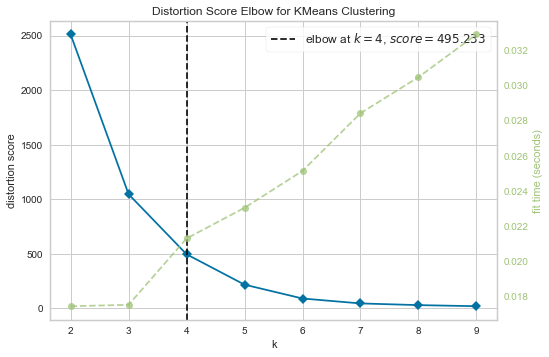

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=None)

In [20]:
#finding optimal number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=4), melb_cluster, k=(2,10))

In [21]:
#attaching cluster lables to orginal data set
melbdf2.insert(0, 'Cluster Lables', kmeans.labels_)
melbdf2.head()

,Cluster Lables,Suburb,Post code,longitude,latitude,Music venues
0,1,Carlton,3053,144.96710,-37.8007,34
1,0,Carlton North,3054,144.96495,-37.7847,69
2,1,Docklands,3008,144.94450,-37.8183,38
3,2,East Melbourne,3002,144.98390,-37.8133,45
4,2,Flemington,3031,144.92295,-37.7937,56


In [24]:
# create map
map_clusters = folium.Map(location=[-37.8007,144.96710], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbdf2['latitude'], melbdf2['longitude'], melbdf2['Suburb'], melbdf2['Cluster Lables']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

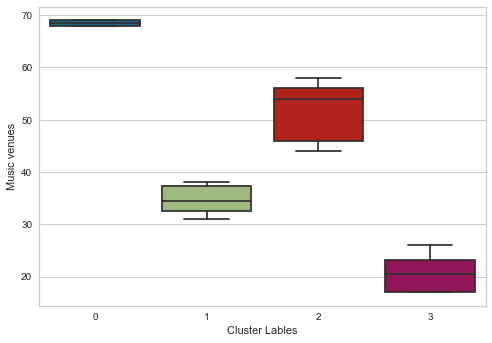

In [23]:
# Boxplot of clusters
ax = sns.boxplot(x="Cluster Lables", y="Music venues", data=melbdf2)